![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Week 3 and 4

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_3_4_EXERCISES.ipynb)


# PANDAS

## Groupby exersises

Import this [dataset](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

*   What is the mean age per occupation?
*   What is the male ratio per occupation, sort it from the most to the least. Do the same for women
*   For each occupation, calculate the minimum and maximum ages
* For each combination of occupation and gender, calculate the mean age
* For each occupation present the percentage of women and men



In [249]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user" , delimiter = '|' , index_col= 'user_id')

In [240]:
#What is the mean age per occupation?
df.groupby( by= 'occupation').mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [241]:
#What is the male ratio per occupation, sort it from the most to the least. Do the same for women

#1- create two Data Frames for Males and females and calcualte the reatio per occupation
dfm = df[df['gender'] == 'M'].groupby( by= 'occupation').count()
dff = df[df['gender'] == 'F'].groupby( by= 'occupation').count()

jdf= pd.concat([dfm,dff] , axis=1 )
jdf.columns = ['m_age', 'm_gender', 'm_zip_code', 'f_age', 'f_gender', 'f_zip_code']
jdf = jdf.fillna(0)


jdf['male_ratio'] = jdf['m_age'] / ( jdf['m_age'] + jdf['f_age'])
jdf['female_ratio'] = jdf['f_age'] / ( jdf['m_age'] + jdf['f_age'])

jdf.sort_values(by='male_ratio' , ascending= False)

,m_age,m_gender,m_zip_code,f_age,f_gender,f_zip_code,male_ratio,female_ratio
doctor,7,7,7,0.0,0.0,0.0,1.000000,0.000000
engineer,65,65,65,2.0,2.0,2.0,0.970149,0.029851
technician,26,26,26,1.0,1.0,1.0,0.962963,0.037037
retired,13,13,13,1.0,1.0,1.0,0.928571,0.071429
programmer,60,60,60,6.0,6.0,6.0,0.909091,0.090909
executive,29,29,29,3.0,3.0,3.0,0.906250,0.093750
scientist,28,28,28,3.0,3.0,3.0,0.903226,0.096774
entertainment,16,16,16,2.0,2.0,2.0,0.888889,0.111111
lawyer,10,10,10,2.0,2.0,2.0,0.833333,0.166667
salesman,9,9,9,3.0,3.0,3.0,0.750000,0.250000


In [242]:
#Do the same for women

jdf.sort_values(by='female_ratio' , ascending= False)

,m_age,m_gender,m_zip_code,f_age,f_gender,f_zip_code,male_ratio,female_ratio
homemaker,1,1,1,6.0,6.0,6.0,0.142857,0.857143
healthcare,5,5,5,11.0,11.0,11.0,0.312500,0.687500
librarian,22,22,22,29.0,29.0,29.0,0.431373,0.568627
artist,15,15,15,13.0,13.0,13.0,0.535714,0.464286
administrator,43,43,43,36.0,36.0,36.0,0.544304,0.455696
none,5,5,5,4.0,4.0,4.0,0.555556,0.444444
writer,26,26,26,19.0,19.0,19.0,0.577778,0.422222
marketing,16,16,16,10.0,10.0,10.0,0.615385,0.384615
other,69,69,69,36.0,36.0,36.0,0.657143,0.342857
student,136,136,136,60.0,60.0,60.0,0.693878,0.306122


In [243]:
#For each occupation, calculate the minimum and maximum ages
df.groupby( by= 'occupation').max()
df.groupby( by= 'occupation').min()

,age,gender,zip_code
occupation,,,
administrator,21,F,02154
artist,19,F,01945
doctor,28,M,47401
educator,23,F,01602
engineer,22,F,00000
entertainment,15,F,01040
executive,22,F,00000
healthcare,22,F,02154
homemaker,20,F,17331


In [244]:
#For each combination of occupation and gender, calculate the mean age
df.groupby( by= ['occupation' , 'gender']).mean('age')

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [245]:
#For each occupation present the percentage of women and men
new_df = jdf[['male_ratio','female_ratio']]

new_df.head()

,male_ratio,female_ratio
administrator,0.544304,0.455696
artist,0.535714,0.464286
doctor,1.000000,0.000000
educator,0.726316,0.273684
engineer,0.970149,0.029851


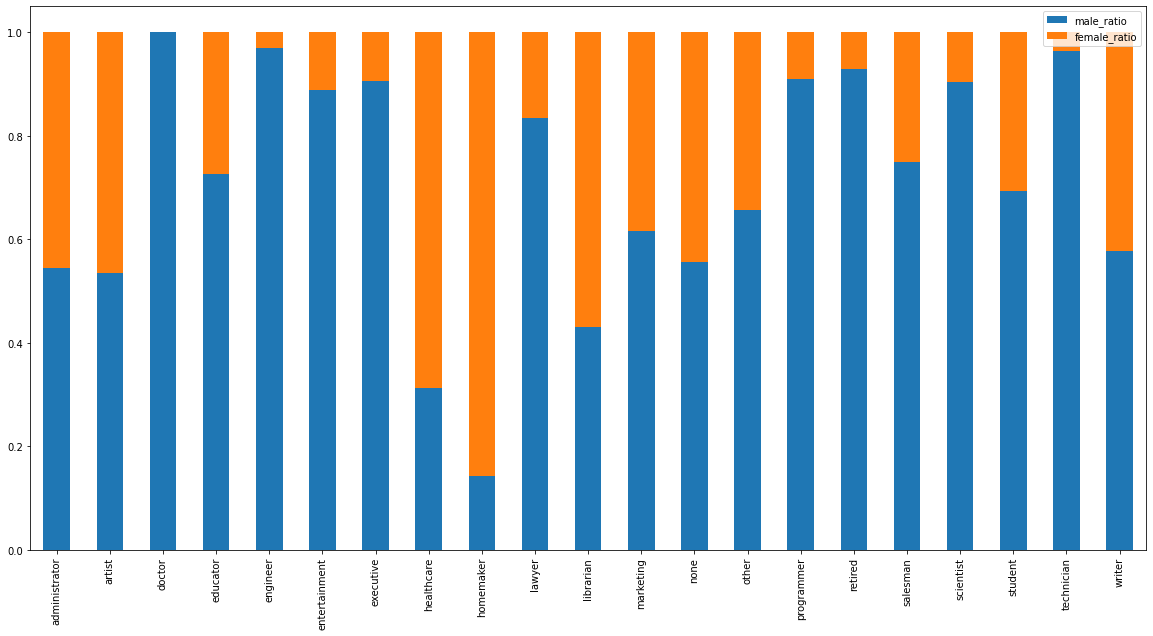

In [259]:
new_df.plot(kind='bar', stacked=True , figsize = (20,10))

## Apply exercises

Import this [dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv)

* What is the type of the columns?
* Convert the type of the column Year to datetime64
* Set the Year column as the index of the dataframe
* Delete the Total column
* Group the year by decades and sum the values (take care with population values) 
* What is the most dangerous decade to live in the US?


In [267]:
import pandas as pd 
data = pd.read_csv('https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv')

In [268]:
#What is the type of the columns?

data.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

In [269]:
#Convert the type of the column Year to datetime64

data.Year = pd.to_datetime(data.Year, format='%Y')

data.dtypes

Year                  datetime64[ns]
Population                     int64
Total                          int64
Violent                        int64
Property                       int64
Murder                         int64
Forcible_Rape                  int64
Robbery                        int64
Aggravated_assault             int64
Burglary                       int64
Larceny_Theft                  int64
Vehicle_Theft                  int64
dtype: object

In [270]:
#Set the Year column as the index of the dataframe

data.set_index('Year' , inplace=True)

In [271]:
#Delete the Total column

data = data.drop(columns='Total')
data.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [272]:
#Group the year by decades and sum the values (take care with population values)

data.groupby((data.index.year//10)*10).sum()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960,1915053175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,2121193298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,2371370069,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,2612825258,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,2947969117,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,1570146307,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [274]:
#What is the most dangerous decade to live in the US?

#1 - calculate the crime_ratio ( total crime / Total population) to column
data['Crime_ratio'] = (data.iloc[:,1].sum())/ (data.iloc[:,0])


#2-Sort
data.sort_values(by='Crime_ratio',ascending=False).head(1)



,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Crime_ratio
Year,,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,0.364617


# SQLite and Pandas

## SQLite, Pandas and the world of tips

Given [this](https://github.com/vfp1/bts-dsf-2020/blob/main/data/tips.csv) CSV file. Do the following:

* Load it in Pandas
* Save the `DataFrame` as SQLite
* Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis:
    * Who is most likely to receive a tip during weekday? A Female or a Male? 
        * And during weekends?
    * What is the table size that is most likely to bring a better tip?
    * Who are giving more tips, smokers or non smokers? 

In [289]:
import pandas as pd 
import sqlite3
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/tips.csv')
data.shape

(244, 7)

In [290]:
#Save the DataFrame as SQLite

#1created database with one table 
conn = sqlite3.connect('tips.db')
c  = conn.cursor()
c.execute('''CREATE TABLE if not exists tips (total_bill, tip, sex, smoker, day, time, size)''')

#2converted frame into an array to itterate on it 
l = np.array(data.values.astype(object))


for i in l:
  query = 'INSERT INTO tips (total_bill, tip, sex, smoker, day, time, size)  values(?,?,?,?,?,?,?)' 
  c.execute(query , i )

conn.commit()
conn.close()




In [296]:
#Who is most likely to receive a tip during weekday? A Female or a Male?
conn = sqlite3.connect('tips.db')
c  = conn.cursor()
query = 'SELECT sex , count(*) from tips GROUP BY sex'
c.execute(query)
c.fetchall()

[('Female', 174), ('Male', 314)]

In [297]:
#And during weekends?
conn = sqlite3.connect('tips.db')
c  = conn.cursor()
query =""" Select sex , count(*) from tips 
Where day <> 'Sat' 
AND day <> 'Sun'
GROUP by sex
"""
c.execute(query)
c.fetchall()

[('Female', 82), ('Male', 80)]

In [298]:
#What is the table size that is most likely to bring a better tip?
conn = sqlite3.connect('tips.db')
c  = conn.cursor()
query ="""
Select size, count(*) from tips 
GROUP by size
order by count(*)
"""
c.execute(query)
c.fetchall()


[(1, 8), (6, 8), (5, 10), (4, 74), (3, 76), (2, 312)]

In [294]:
#Who are giving more tips, smokers or non smokers?

conn = sqlite3.connect('tips.db')
c  = conn.cursor()
query ="""
Select smoker, count(*) from tips 
GROUP by smoker
order by count(*)
"""
c.execute(query)
c.fetchall()

[('Yes', 186), ('No', 302)]

In [299]:

conn.close()

## More airports

For extra points, plot the routs of incoming/outgoing destinations using Geopandas
 

Download [this Sqlite database](https://github.com/vfp1/bts-dsf-2020/raw/main/data/flights.db)

Using SQLite database reply the following questions:

*   Which is the country that has the least amount of active airlines?
*   And which is the country that has the most amount of active airlines?
*   Which is the country that has more airports?
*   And the country with the least airports?
*   Which country has the most outgoing destinations? And the least?
*   And which country has the most incoming destinations? And the least?



In [302]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3 
conn  = sqlite3.connect('flights.db')
c = conn.cursor()
query = """SELECT * FROM airports """
data = pd.read_sql_query(query , conn)
conn.close()
data.head()

,index,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby
1,1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.7887,20,10,U,Pacific/Port_Moresby
2,2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10,U,Pacific/Port_Moresby
3,3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10,U,Pacific/Port_Moresby
4,4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.22005,146,10,U,Pacific/Port_Moresby


In [303]:
#Which is the country that has the least amount of active airlines?

conn  = sqlite3.connect('flights.db')
c = conn.cursor()

query = """SELECT country , count(*) FROM airlines
WHERE active = 'Y'
GROUP by country
ORDER by Count(*) ASC """

data = pd.read_sql_query(query , conn)

conn.close()

data.head()

,country,count(*)
0,S.A.,1
1,ALASKA,1
2,AVIANCA,1
3,American Samoa,1
4,Antigua and Barbuda,1


In [304]:
#And which is the country that has the most amount of active airlines?
conn  = sqlite3.connect('flights.db')
c = conn.cursor()

query = """SELECT country , count(*) FROM airlines
WHERE active = 'Y'
GROUP by country
ORDER by Count(*) DESC """

data = pd.read_sql_query(query , conn)

conn.close()

data.head(1)


,country,count(*)
0,United States,141


In [305]:
#Which is the country that has more airports?

conn  = sqlite3.connect('flights.db')
c = conn.cursor()

query = """SELECT country , COUNT(*) FROM airports
GROUP BY country
ORDER BY COUNT(*) DESC
"""

data = pd.read_sql_query(query , conn)

conn.close()

data.head(1)

,country,COUNT(*)
0,United States,1697


In [306]:
#And the country with the least airports?
conn  = sqlite3.connect('flights.db')
c = conn.cursor()

query = """SELECT country , COUNT(*) FROM airports
GROUP BY country
ORDER BY COUNT(*) ASC
"""

data = pd.read_sql_query(query , conn)

conn.close()

data.head(1)

,country,COUNT(*)
0,Albania,1


In [287]:
#Which country has the most outgoing destinations? And the least?
conn  = sqlite3.connect('flights.db')
c = conn.cursor()

query = """SELECT  country, count(dest) FROM routes 
INNER JOIN airports
ON airports.code = routes.source
GROUP BY country 
ORDER BY count(dest) DESC 
"""

data1 = pd.read_sql_query(query , conn)

query = """SELECT  country, count(dest) FROM routes 
INNER JOIN airports
ON airports.code = routes.source
GROUP BY country 
ORDER BY count(dest) ASC
""" 
data2 = pd.read_sql_query(query , conn)

conn.close()

print(data1.head(1))
print(data2.head(1))

         country  count(dest)
0  United States        13195
          country  count(dest)
0  American Samoa            1


In [307]:
#And which country has the most incoming destinations? And the least?
conn  = sqlite3.connect('flights.db')
c = conn.cursor()

query = """SELECT  country, count(dest) FROM routes 
INNER JOIN airports
ON airports.code = routes.dest
GROUP BY country 
ORDER BY count(dest) DESC 
"""

data = pd.read_sql_query(query , conn)

conn.close()

data.head(1)


,country,count(dest)
0,United States,13189


# Kaggle Titanic

Your first Kaggle challenge! 

Retrieve the csv (train) file from [this Kaggle challenge](https://www.kaggle.com/c/titanic/data?select=train.csv)

Either here or through a Kaggle notebook (you will need to submit then this notebook with the rest of exercises and the Kaggle notebook).

Reply to the following questions:



1.   How many men and women survived?
2.   What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years
3. Which port of embarkation had most of the survivors? And which less?
4. Which ticket class had most of the survivors? And which less?
5. Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?



In [308]:
import pandas as pd 


data = pd.read_csv("/content/train.csv")

In [309]:
#How many men and women survived?

data[data['Survived'] == 1].groupby(by='Sex').sum()

#answer men 233, Women 109


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,100120,233,447,5683.00,120,120,12101.6876
male,51854,109,220,2536.67,42,39,4449.5418


In [310]:

#What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years


#create age group column : 
import numpy as np
data['Age_group'] = (data['Age'] / 10 ).apply(np.floor)

#create DF with ratio of (survived / Total )
survival_ratio = data[data['Survived'] == 1].groupby(by='Age_group').count() / data.groupby(by='Age_group').count()

survival_ratio.iloc[:,1].to_frame()

#Answer : highist survival is 80-90 .... also 0-10 had high survival rate. 


,Survived
Age_group,
0.0,0.612903
1.0,0.401961
2.0,0.350000
3.0,0.437126
4.0,0.382022
5.0,0.416667
6.0,0.315789
7.0,NaN
8.0,1.000000


In [311]:
#Which port of embarkation had most of the survivors? And which less?

data.groupby(by='Embarked').sum().sort_values(by='Survived')
#you can use sum() because survival is 1 and death is 0 



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_group
Embarked,,,,,,,,
Q,32178,30,224,786.50,33,13,1022.2543,67.0
C,74820,93,317,4005.92,65,61,10072.2962,345.0
S,289496,217,1514,16312.75,368,266,17439.3988,1382.0


In [312]:
#Which ticket class had most of the survivors? And which less?
data.groupby(by='Pclass').sum().sort_values(by='Survived')

#answer : highest 1 and lowest is 2 

,PassengerId,Survived,Age,SibSp,Parch,Fare,Age_group
Pclass,,,,,,,
2,82056,87,5168.83,74,70,3801.8417,440.0
3,215625,119,8924.92,302,193,6714.6951,737.0
1,99705,136,7111.42,90,77,18177.4125,626.0


In [313]:
#Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?


#calcualte survival ratio by class 
survival_ratio = data[data['Survived'] == 1].groupby(by='Pclass').count() / data.groupby(by='Pclass').count()

ratio_p = survival_ratio.iloc[:,1].to_frame().sort_values(by='Pclass')

#calcualte average price per ticket 

price_p =  data.groupby(by='Pclass').mean().sort_values(by='Pclass')

#merge mean price and survival ratio and compare results 
comp_data = pd.concat([price_p.iloc[:,5] , ratio_p] , axis=1)

comp_data 
#answer .. the more you pay the more your surival 

#other way 
data.groupby(by='Survived').mean() 

#ppl who paid more survived 


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_group
Survived,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,2.615566
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408,2.393103
